In [1]:
import pandas as pd
import numpy as np
import os
import pickle as pk
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

## Dataset:

In [2]:
DATA_path= 'https://raw.githubusercontent.com/RodrigoAcev/OBESITY_LEVELS/master/data/ObesityDataSet_raw_and_data_sinthetic.csv'

In [3]:
df = pd.read_csv(DATA_path)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Transformación variables categóricas:

In [4]:
#Nombre de columnas con datos categoricos y numericos:
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
            'SCC', 'CALC', 'MTRANS']

num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [5]:
#Diccionario con clases 
class_dict = {'Insufficient_Weight': 0,
              'Normal_Weight': 1,
              'Overweight_Level_I': 2,
              'Overweight_Level_II': 3,
              'Obesity_Type_I': 4,
              'Obesity_Type_II': 5,
              'Obesity_Type_III': 6}

inv_class = dict((v_i,k_i) for k_i, v_i in class_dict.items())
#inv_class

df['NObeyesdad'] = df['NObeyesdad'].apply(lambda x: class_dict[x])

In [6]:
#Diccionario para transformacion de variables categoricas a numericas:
attr_dic = {'yes':1,
            'no':0,
            'Sometimes':1,
            'Frequently':2,
            'Always':3,
            'Male':0,
            'Female':1,
            'Walking':0,
            'Bike':1,
            'Public_Transportation':2,
            'Motorbike':3,
            'Automobile':4
           }

In [7]:
df.replace(attr_dic, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [8]:
#ELiminacion de columnas:
df.drop(['FAVC', 'CAEC', 'TUE', 'FCVC'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   NCP                             2111 non-null   float64
 6   SMOKE                           2111 non-null   int64  
 7   CH2O                            2111 non-null   float64
 8   SCC                             2111 non-null   int64  
 9   FAF                             2111 non-null   float64
 10  CALC                            2111 non-null   int64  
 11  MTRANS                          2111 non-null   int64  
 12  NObeyesdad                      21

## Train & Test Split

In [9]:
X = df.drop(['NObeyesdad'], axis=1).copy()
y = df['NObeyesdad'].copy()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=2)
X_train.shape, X_test.shape

((1688, 12), (423, 12))

## Normalización de datos

In [11]:
from sklearn.preprocessing import StandardScaler

cat_cols.remove('FAVC')
cat_cols.remove('CAEC')

num_cols.remove('TUE')
num_cols.remove('FCVC')



#Normalizacion datos categoricos:
scaler_cat = StandardScaler()
X_train.loc[:,cat_cols] = scaler_cat.fit_transform(X_train.loc[:,cat_cols].values)

#Normalizacion datos numericos:
scaler_num = StandardScaler()
X_train.loc[:,num_cols] = scaler_num.fit_transform(X_train.loc[:,num_cols].values)
X_train.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,NCP,SMOKE,CH2O,SCC,FAF,CALC,MTRANS
count,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03,1.688000e+03
mean,2.907101e-17,3.306662e-17,1.902770e-16,-4.331711e-16,2.175064e-16,3.811459e-16,1.820884e-16,-1.472788e-16,-3.199784e-17,1.099700e-16,2.221761e-16,2.997208e-16
std,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00,1.000296e+00
min,-9.940933e-01,-1.642070e+00,-2.693071e+00,-1.818819e+00,-2.120936e+00,-2.089368e+00,-1.455116e-01,-1.630419e+00,-2.033040e-01,-1.189390e+00,-1.409166e+00,-2.614045e+00
25%,-9.940933e-01,-6.927107e-01,-7.660327e-01,-8.109895e-01,4.714899e-01,-2.176345e-01,-1.455116e-01,-7.365456e-01,-2.033040e-01,-1.037004e+00,-1.409166e+00,-4.225834e-01
50%,-9.940933e-01,-2.280389e-01,-8.855673e-03,-1.452212e-01,4.714899e-01,4.300598e-01,-1.455116e-01,-5.086387e-03,-2.033040e-01,-1.978376e-02,5.137704e-01,-4.225834e-01
75%,1.005942e+00,2.828651e-01,7.237420e-01,7.723947e-01,4.714899e-01,4.300598e-01,-1.455116e-01,7.607783e-01,-2.033040e-01,7.539764e-01,5.137704e-01,-4.225834e-01
max,1.005942e+00,5.095203e+00,2.997466e+00,3.321025e+00,4.714899e-01,1.689774e+00,6.872305e+00,1.620246e+00,4.918743e+00,2.319429e+00,4.359644e+00,1.768878e+00


In [12]:
#Guardar scalers:
if not(os.path.exists('./Scalers/')):
    os.mkdir('./Scalers/')

with open('./Scalers/scaler_cat.scaler', 'wb') as f:
    pk.dump(scaler_cat, f)

with open('./Scalers/scaler_num.scaler', 'wb') as f:
    pk.dump(scaler_num, f)

## Multinomial Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score

params_dict = {'multi_class': ['multinomial'],
               'penalty': ['l1', 'l2', 'elasticnet'],
               'C': np.arange(0.1,101,.1),
               'class_weight': ['balanced'],
               'solver' : ['newton-cg', 'sag', 'saga', 'lbfgs']
              }

model = LogisticRegression()

combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

12108

In [15]:
#Random search:
random_cv = RandomizedSearchCV(LogisticRegression(), 
                               params_dict, 
                               scoring='f1_macro', 
                               cv=10, 
                               n_iter=120,
                               n_jobs=-1,
                               random_state=42)
random_cv.fit(X_train, y_train)
random_cv.best_params_

{'solver': 'newton-cg',
 'penalty': 'l2',
 'multi_class': 'multinomial',
 'class_weight': 'balanced',
 'C': 94.1}

In [16]:
best_random = random_cv.best_estimator_
best_random.score(X_train, y_train)

0.9757109004739336

In [17]:
params_dict = {'multi_class': ['multinomial'],
               'penalty': ['l2'],
               'C': np.arange(90,100,1),
               'class_weight': ['balanced'],
               'solver' : ['newton-cg']
              }
combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

10

In [18]:
#GridSearch:
model = LogisticRegression()
grid_cv = GridSearchCV(estimator = model, 
                       param_grid = params_dict, 
                       scoring='accuracy',
                       cv = 10,
                       verbose=2, 
                       n_jobs = -1
                       )
grid_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'class_weight': ['balanced'],
                         'multi_class': ['multinomial'], 'penalty': ['l2'],
                         'solver': ['newton-cg']},
             scoring='accuracy', verbose=2)

In [20]:
grid_cv.best_params_, grid_cv.best_score_

({'C': 92,
  'class_weight': 'balanced',
  'multi_class': 'multinomial',
  'penalty': 'l2',
  'solver': 'newton-cg'},
 0.9668392504930967)

In [21]:
lgr_model = LogisticRegression(**grid_cv.best_params_, random_state=42)
lgr_model.fit(X_train, y_train)

LogisticRegression(C=92, class_weight='balanced', multi_class='multinomial',
                   random_state=42, solver='newton-cg')

In [22]:
f1_score(y_train, lgr_model.predict(X_train), average='macro')

0.9747364209335608

In [23]:
#Preparar datos de prueba:
X_test.loc[:, cat_cols] = scaler_cat.transform(X_test.loc[:,cat_cols].values)
X_test.loc[:, num_cols] = scaler_num.transform(X_test.loc[:,num_cols].values)

#X_test = obs_pca.transform(X_test)
X_test.shape

(423, 12)

In [24]:
y_hat = lgr_model.predict(X_test)
f1_score(y_test, y_hat, average='macro')

0.9440401163529009

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.96        54
      Normal_Weight       0.98      0.91      0.95        58
 Overweight_Level_I       0.84      0.97      0.90        58
Overweight_Level_II       0.96      0.81      0.88        58
     Obesity_Type_I       0.97      0.96      0.96        70
    Obesity_Type_II       0.97      0.97      0.97        60
   Obesity_Type_III       0.98      1.00      0.99        65

           accuracy                           0.95       423
          macro avg       0.95      0.94      0.94       423
       weighted avg       0.95      0.95      0.95       423



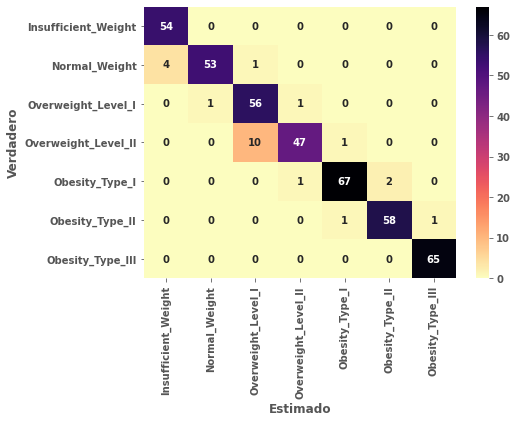

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def GraficaCM(y_test, y_hat, class_dict):

    labels_classes = list(class_dict.keys())
    
    cm = confusion_matrix(y_test, y_hat)

    print(classification_report(y_test, y_hat, target_names=labels_classes))

    fig, axs = plt.subplots(figsize=(7,5))

    sns.heatmap(cm, annot=True, ax=axs, cmap='magma_r')

    axs.set_yticks(np.arange(len(labels_classes))+.5)
    axs.set_xticks(np.arange(len(labels_classes))+.5)

    axs.set_xticklabels(labels_classes, rotation=90)
    axs.set_yticklabels(labels_classes, rotation=0)

    axs.set_ylabel('Verdadero')
    axs.set_xlabel('Estimado')

    plt.show()
    
GraficaCM(y_test, y_hat, class_dict)

## SVM

In [26]:
from sklearn.svm import SVC

params_dict = {'kernel':[ 'sigmoid', 'rbf', 'poly', 'linear'],
               'C': np.arange(0.1,101,.1),
               'class_weight': ['balanced', None],
               'probability' : [True]
              }

model = SVC()

combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

8072

In [27]:
#Random search:
random_cv = RandomizedSearchCV(model, 
                               params_dict, 
                               scoring='f1_macro', 
                               cv=10, 
                               n_iter=20,
                               n_jobs=-1,
                               random_state=42)
random_cv.fit(X_train, y_train)
random_cv.best_params_

{'probability': True, 'kernel': 'linear', 'class_weight': None, 'C': 77.9}

In [28]:
best_random = random_cv.best_estimator_
best_random.score(X_train, y_train)

0.981042654028436

In [29]:
params_dict = {'kernel':['linear'],
              #'degree': [2,3,4],
               'C': np.arange(70,80,.5),
               'class_weight': ['balanced'],
               'probability' : [True]
              }
combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

20

In [30]:
#GridSearch:
model = SVC()
grid_cv = GridSearchCV(estimator = model, 
                       param_grid = params_dict, 
                       scoring='f1_macro',
                       cv = 10,
                       verbose=2, 
                       n_jobs = -1
                       )
grid_cv.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([70. , 70.5, 71. , 71.5, 72. , 72.5, 73. , 73.5, 74. , 74.5, 75. ,
       75.5, 76. , 76.5, 77. , 77.5, 78. , 78.5, 79. , 79.5]),
                         'class_weight': ['balanced'], 'kernel': ['linear'],
                         'probability': [True]},
             scoring='f1_macro', verbose=2)

In [31]:
grid_cv.best_params_, grid_cv.best_score_

({'C': 70.0,
  'class_weight': 'balanced',
  'kernel': 'linear',
  'probability': True},
 0.968705545860759)

In [32]:
svm_model = SVC(**grid_cv.best_params_)
svm_model.fit(X_train, y_train)

SVC(C=70.0, class_weight='balanced', kernel='linear', probability=True)

In [33]:
y_hat_svm = svm_model.predict(X_test)
f1_svm = f1_score(y_test, y_hat_svm, average='macro')
f1_svm

0.9536624028517856

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_hat_svm)

0.9550827423167849

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      1.00      0.97        54
      Normal_Weight       0.96      0.91      0.94        58
 Overweight_Level_I       0.85      0.95      0.89        58
Overweight_Level_II       0.98      0.86      0.92        58
     Obesity_Type_I       0.99      0.99      0.99        70
    Obesity_Type_II       0.98      0.97      0.97        60
   Obesity_Type_III       0.98      1.00      0.99        65

           accuracy                           0.96       423
          macro avg       0.96      0.95      0.95       423
       weighted avg       0.96      0.96      0.96       423



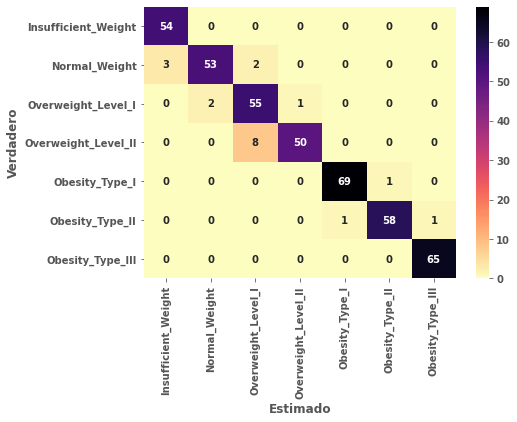

In [35]:
GraficaCM(y_test, y_hat_svm, class_dict)

## Decision Trees

In [36]:
from sklearn.tree import DecisionTreeClassifier

params_dict = {'max_depth':np.arange(3,16),
               'min_samples_split': np.arange(2,200,10),
               'class_weight': ['balanced'],
               'max_features' : list(np.arange(0.1,1.1,.1))+['sqrt']
              }

model = DecisionTreeClassifier()

combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

2860

In [37]:
#Random search:
random_cv = RandomizedSearchCV(model, 
                               params_dict, 
                               scoring='f1_macro', 
                               cv=10, 
                               n_iter=20,
                               n_jobs=-1,
                               random_state=42)
random_cv.fit(X_train, y_train)
random_cv.best_params_

{'min_samples_split': 22,
 'max_features': 0.9,
 'max_depth': 9,
 'class_weight': 'balanced'}

In [38]:
best_random = random_cv.best_estimator_
best_random.score(X_train, y_train)

0.9520142180094787

In [39]:
params_dict = {'max_depth':np.arange(7,11),
               'min_samples_split': np.arange(20,26),
               'class_weight': ['balanced'],
               'max_features' : [1,0.9,'sqrt']
              }

combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

72

In [40]:
#GridSearch:
model = DecisionTreeClassifier()
grid_cv = GridSearchCV(estimator = model, 
                       param_grid = params_dict, 
                       scoring='f1_macro',
                       cv = 10,
                       verbose=2, 
                       n_jobs = -1
                       )
grid_cv.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': array([ 7,  8,  9, 10]),
                         'max_features': [1, 0.9, 'sqrt'],
                         'min_samples_split': array([20, 21, 22, 23, 24, 25])},
             scoring='f1_macro', verbose=2)

In [41]:
grid_cv.best_params_, grid_cv.best_score_

({'class_weight': 'balanced',
  'max_depth': 10,
  'max_features': 0.9,
  'min_samples_split': 21},
 0.9000412831418071)

In [42]:
dt_model = DecisionTreeClassifier(**grid_cv.best_params_)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=0.9,
                       min_samples_split=21)

In [43]:
y_hat_dt = dt_model.predict(X_test)
f1_dt = f1_score(y_test, y_hat_dt, average='macro')
f1_dt

0.8825753199867751

In [44]:
accuracy_score(y_test, y_hat_dt)

0.8841607565011821

                     precision    recall  f1-score   support

Insufficient_Weight       0.86      0.89      0.87        54
      Normal_Weight       0.80      0.84      0.82        58
 Overweight_Level_I       0.92      0.81      0.86        58
Overweight_Level_II       0.81      0.86      0.83        58
     Obesity_Type_I       0.89      0.83      0.86        70
    Obesity_Type_II       0.92      0.95      0.93        60
   Obesity_Type_III       0.98      1.00      0.99        65

           accuracy                           0.88       423
          macro avg       0.88      0.88      0.88       423
       weighted avg       0.89      0.88      0.88       423



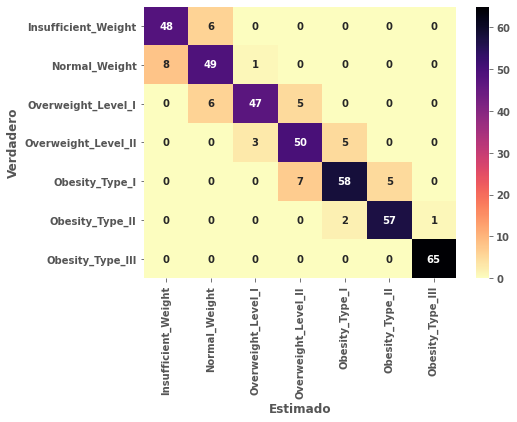

In [45]:
GraficaCM(y_test, y_hat_dt, class_dict)

## Kneighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier

params_dict = {'n_neighbors':np.arange(4,16),
               'weights': ['distance', 'uniform'],
               'algorithm': ['ball_tree', 'kd_tree', 'brute']
              }

model = KNeighborsClassifier()


combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

72

In [47]:
#Random search:
random_cv = RandomizedSearchCV(model, 
                               params_dict, 
                               scoring='f1_macro', 
                               cv=10, 
                               n_iter=20,
                               n_jobs=-1,
                               random_state=42)
random_cv.fit(X_train, y_train)
random_cv.best_params_

{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'ball_tree'}

In [48]:
best_random = random_cv.best_estimator_
best_random.score(X_train, y_train)

1.0

In [49]:
params_dict = {'n_neighbors':np.arange(3,6),
               'weights': ['distance'],
               'algorithm': ['ball_tree']
              }


combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

3

In [50]:
#GridSearch:
model = KNeighborsClassifier()
grid_cv = GridSearchCV(estimator = model, 
                       param_grid = params_dict, 
                       scoring='f1_macro',
                       cv = 10,
                       verbose=2, 
                       n_jobs = -1
                       )
grid_cv.fit(X_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree'],
                         'n_neighbors': array([3, 4, 5]),
                         'weights': ['distance']},
             scoring='f1_macro', verbose=2)

In [51]:
grid_cv.best_params_, grid_cv.best_score_

({'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'},
 0.8266049247618212)

In [52]:
kn_model = KNeighborsClassifier(**grid_cv.best_params_)
kn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3, weights='distance')

In [53]:
y_hat_kn = kn_model.predict(X_test)
f1_kn = f1_score(y_test, y_hat_kn, average='macro')
f1_kn

0.8223306168469412

                     precision    recall  f1-score   support

Insufficient_Weight       0.80      0.89      0.84        54
      Normal_Weight       0.61      0.52      0.56        58
 Overweight_Level_I       0.79      0.76      0.77        58
Overweight_Level_II       0.76      0.83      0.79        58
     Obesity_Type_I       0.88      0.84      0.86        70
    Obesity_Type_II       0.90      0.95      0.93        60
   Obesity_Type_III       1.00      1.00      1.00        65

           accuracy                           0.83       423
          macro avg       0.82      0.83      0.82       423
       weighted avg       0.83      0.83      0.83       423



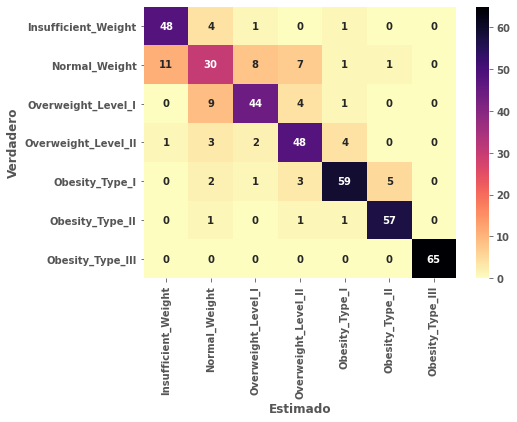

In [54]:
GraficaCM(y_test, y_hat_kn, class_dict)

## RandomForest

In [55]:
from sklearn.ensemble import RandomForestClassifier

params_dict = {'n_estimators':np.arange(25,1001,25),
            'max_depth': np.arange(3,16),
            'max_features': ['sqrt', 0.2, .3, .4, .5, 
                             .6, .7, .8, .9, 1],
            'class_weight':['balanced']
            }

model = RandomForestClassifier()


combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

5200

In [56]:
#Random search:
random_cv = RandomizedSearchCV(model, 
                               params_dict, 
                               scoring='f1_macro', 
                               cv=10, 
                               n_iter=10,
                               n_jobs=-1,
                               random_state=42)
random_cv.fit(X_train, y_train)
random_cv.best_params_

{'n_estimators': 125,
 'max_features': 0.7,
 'max_depth': 11,
 'class_weight': 'balanced'}

In [57]:
best_random = random_cv.best_estimator_
best_random.score(X_train, y_train)

1.0

In [58]:
params_dict = {'n_estimators':np.arange(100,150,5),
            'max_depth': np.arange(10,13),
            'max_features': np.arange(0.65,.75,.1),
            'class_weight':['balanced']
            }


combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

30

In [59]:
#GridSearch:
model = RandomForestClassifier()
grid_cv = GridSearchCV(estimator = model, 
                       param_grid = params_dict, 
                       scoring='f1_macro',
                       cv = 10,
                       verbose=2, 
                       n_jobs = -1
                       )
grid_cv.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': array([10, 11, 12]),
                         'max_features': array([0.65]),
                         'n_estimators': array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145])},
             scoring='f1_macro', verbose=2)

In [60]:
grid_cv.best_params_, grid_cv.best_score_

({'class_weight': 'balanced',
  'max_depth': 12,
  'max_features': 0.65,
  'n_estimators': 130},
 0.9676793184746305)

In [61]:
rf_model = RandomForestClassifier(**grid_cv.best_params_, oob_score=True)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, max_features=0.65,
                       n_estimators=130, oob_score=True)

In [62]:
y_hat_rf = rf_model.predict(X_test)
f1_rf = f1_score(y_test, y_hat_rf, average='macro')
f1_rf

0.9593290493964873

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      1.00      0.99        54
      Normal_Weight       0.95      0.91      0.93        58
 Overweight_Level_I       0.87      0.95      0.91        58
Overweight_Level_II       0.95      0.93      0.94        58
     Obesity_Type_I       0.99      0.96      0.97        70
    Obesity_Type_II       1.00      0.97      0.98        60
   Obesity_Type_III       0.98      1.00      0.99        65

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



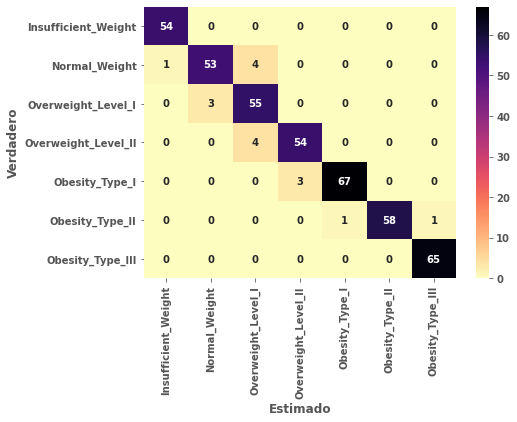

In [63]:
GraficaCM(y_test, y_hat_rf, class_dict)

## XGBoosting

In [65]:
from xgboost import XGBClassifier


params_dict = {'n_estimators':np.arange(25,1001,25),
            'max_depth': np.arange(3,16),
            'colsample_bytree': np.arange(0.1,1.1,.1)
            }


model = XGBClassifier()


combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

5200

In [66]:
#Random search:
random_cv = RandomizedSearchCV(model, 
                               params_dict, 
                               scoring='f1_macro', 
                               cv=10, 
                               n_iter=10,
                               n_jobs=-1,
                               random_state=42)
random_cv.fit(X_train, y_train)
random_cv.best_params_

[02:58:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'n_estimators': 300, 'max_depth': 4, 'colsample_bytree': 0.7000000000000001}

In [67]:
best_random = random_cv.best_estimator_
best_random.score(X_train, y_train)

1.0

In [69]:
params_dict = {'n_estimators':np.arange(250,351,10),
            'max_depth': np.arange(3,5),
            'colsample_bytree': np.arange(0.65,0.76,.05)
            }

combinacion_total=1
for k, v in params_dict.items():
    combinacion_total *=len(v)
combinacion_total

66

In [70]:
#GridSearch:
model = XGBClassifier()
grid_cv = GridSearchCV(estimator = model, 
                       param_grid = params_dict, 
                       scoring='f1_macro',
                       cv = 10,
                       verbose=2, 
                       n_jobs = -1
                       )
grid_cv.fit(X_train, y_train)

Fitting 10 folds for each of 66 candidates, totalling 660 fits
[03:02:31] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [71]:
grid_cv.best_params_, grid_cv.best_score_

({'colsample_bytree': 0.7000000000000001, 'max_depth': 4, 'n_estimators': 260},
 0.9689902007591007)

In [72]:
xgb_model = XGBClassifier(**grid_cv.best_params_)
xgb_model.fit(X_train, y_train)

[03:02:40] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7000000000000001,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=260, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
y_hat_xgb = xgb_model.predict(X_test)
f1_xgb = f1_score(y_test, y_hat_xgb, average='macro')
f1_xgb

0.9680291518570233

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      1.00      0.97        54
      Normal_Weight       0.93      0.90      0.91        58
 Overweight_Level_I       0.93      0.97      0.95        58
Overweight_Level_II       1.00      0.93      0.96        58
     Obesity_Type_I       0.97      1.00      0.99        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      1.00      1.00        65

           accuracy                           0.97       423
          macro avg       0.97      0.97      0.97       423
       weighted avg       0.97      0.97      0.97       423



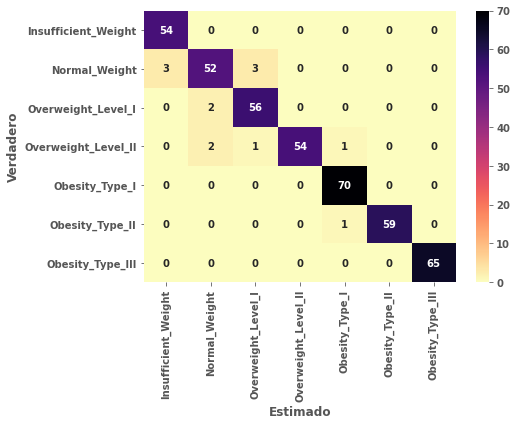

In [74]:
GraficaCM(y_test, y_hat_xgb, class_dict)

## Resultados

In [75]:
#Valores estimados:
y_hat_log = lgr_model.predict(X_test)
y_hat_rf = rf_model.predict(X_test)
y_hat_svm = svm_model.predict(X_test)
y_hat_kn = kn_model.predict(X_test)
y_hat_dt = dt_model.predict(X_test)
y_hat_xgb = xgb_model.predict(X_test)

In [76]:
from sklearn.metrics import precision_score, f1_score, recall_score

#Precision:
from sklearn.metrics import precision_score, f1_score, recall_score
lg_pre = precision_score(y_test, y_hat_log, average='macro')
rf_pre = precision_score(y_test, y_hat_rf, average='macro')
svm_pre = precision_score(y_test, y_hat_svm, average='macro')
dt_pre = precision_score(y_test, y_hat_dt, average='macro')
kn_pre = precision_score(y_test, y_hat_kn, average='macro')
xgb_pre = precision_score(y_test, y_hat_xgb, average='macro')

#F1:
lg_f1 = f1_score(y_test, y_hat_log, average='macro')
rf_f1 = f1_score(y_test, y_hat_rf, average='macro')
svm_f1 = f1_score(y_test, y_hat_svm, average='macro')
dt_f1 = f1_score(y_test, y_hat_dt, average='macro')
kn_f1 = f1_score(y_test, y_hat_kn, average='macro')
xgb_f1 = f1_score(y_test, y_hat_xgb, average='macro')

#Sensibilidad:
lg_re = recall_score(y_test, y_hat_log, average='macro')
rf_re = recall_score(y_test, y_hat_rf, average='macro')
svm_re = recall_score(y_test, y_hat_svm, average='macro')
dt_re = recall_score(y_test, y_hat_dt, average='macro')
kn_re = recall_score(y_test, y_hat_kn, average='macro')
xgb_re = recall_score(y_test, y_hat_xgb, average='macro')

#accuracy:
lg_ac = accuracy_score(y_test, y_hat_log)
rf_ac = accuracy_score(y_test, y_hat_rf)
svm_ac = accuracy_score(y_test, y_hat_svm)
dt_ac = accuracy_score(y_test, y_hat_dt)
kn_ac = accuracy_score(y_test, y_hat_kn)
xgb_ac = accuracy_score(y_test, y_hat_xgb)

In [77]:
df_results = pd.DataFrame({'Modelo': ['RandomForest', 'LogisticRegression', 'SVM', 'DecisionTree', 
                                     'XGBClassifier', 'KNeighbors'],
                          'Precision': [rf_pre, lg_pre, svm_pre,
                                           dt_pre, xgb_pre, kn_pre],
                          'Recall': [rf_re, lg_re, svm_re,
                                           dt_re, xgb_re, kn_re],
                          'f1_score': [rf_f1, lg_f1, svm_f1,
                                           dt_f1, xgb_f1, kn_f1],
                          'accuracy': [rf_ac, lg_ac, svm_ac,
                                           dt_ac, xgb_ac, kn_ac]})
df_results

,Modelo,Precision,Recall,f1_score,accuracy
0,RandomForest,0.959825,0.959559,0.959329,0.959811
1,LogisticRegression,0.947150,0.944781,0.944040,0.945626
2,SVM,0.955881,0.953788,0.953662,0.955083
3,DecisionTree,0.883565,0.883529,0.882575,0.884161
4,XGBClassifier,0.968785,0.968062,0.968029,0.969267
5,KNeighbors,0.820746,0.826456,0.822331,0.829787


In [78]:
df_results.sort_values(['f1_score', 'Recall'], ascending=False, ignore_index=True)

,Modelo,Precision,Recall,f1_score,accuracy
0,XGBClassifier,0.968785,0.968062,0.968029,0.969267
1,RandomForest,0.959825,0.959559,0.959329,0.959811
2,SVM,0.955881,0.953788,0.953662,0.955083
3,LogisticRegression,0.947150,0.944781,0.944040,0.945626
4,DecisionTree,0.883565,0.883529,0.882575,0.884161
5,KNeighbors,0.820746,0.826456,0.822331,0.829787


Se **eliminaron** las siguientes variables: **"FAVC", "CAEC", "TUE", "FCVC"**

## Voting

In [81]:
from copy import copy

In [108]:
from sklearn.ensemble import VotingClassifier

vt_model = VotingClassifier(estimators=[('lr', copy(lgr_model)),
                                     ('xGB', copy(xgb_model)),
                                     ('RF', copy(rf_model)),
                                     ('SVM', copy(svm_model)),
                                     ('kn', copy(kn_model)),
                                     ('dt', copy(dt_model))
                                    ],
                           weights=[1,2,1.5,1.3,.9,.9],
                         voting='hard')

vt_model.fit(X_train, y_train)

[03:26:52] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=92, class_weight='balanced',
                                                 multi_class='multinomial',
                                                 random_state=42,
                                                 solver='newton-cg')),
                             ('xGB',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.7000000000000001,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_...
                                                     max_features=0.65,
                                                     n_est

In [109]:
y_hat_voting = vt_model.predict(X_test)

f1_score(y_test, y_hat_voting, average='macro')

0.9729776704403034

In [113]:
#with open('./Modelos/voting.model','wb') as f:
#    pk.dump(vt_model,f)

## Stacking

In [117]:
from sklearn.ensemble import StackingClassifier

st_model = StackingClassifier(estimators=[('lr', copy(lgr_model)),
                                     ('xGB', copy(xgb_model)),
                                     ('RF', copy(rf_model)),
                                     ('SVM', copy(svm_model)),
                                     ('kn', copy(kn_model)),
                                     ('dt', copy(dt_model))
                                    ],
                              final_estimator= LogisticRegression(multi_class='multinomial')
                             )

st_model.fit(X_train, y_train)

[03:49:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:49:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:49:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:49:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation

StackingClassifier(estimators=[('lr',
                                LogisticRegression(C=92,
                                                   class_weight='balanced',
                                                   multi_class='multinomial',
                                                   random_state=42,
                                                   solver='newton-cg')),
                               ('xGB',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.7000000000000001,
                                              enable_categorical=False, gamma=0,
                                              gpu_id=-1, importance_type=None,
                                              interactio...
                                                       

In [120]:
y_hat_stack = st_model.predict(X_test)
f1_score(y_test, y_hat_stack, average='macro')

0.9758531891052957

In [124]:
#with open('./Modelos/stacking.model','wb') as f:
#    pk.dump(st_model,f)

In [121]:
#precision:
vt_pre = precision_score(y_test, y_hat_voting, average='macro')
st_pre = precision_score(y_test, y_hat_stack, average='macro')

#f1
st_f1 = f1_score(y_test, y_hat_stack, average='macro')
vt_f1 = f1_score(y_test, y_hat_voting, average='macro')
#sensibilidad
vt_re = recall_score(y_test, y_hat_voting, average='macro')
st_re = recall_score(y_test, y_hat_stack, average='macro')

#accuracy
st_ac = accuracy_score(y_test, y_hat_stack)
vt_ac = accuracy_score(y_test, y_hat_voting)

In [122]:
df_results = pd.DataFrame({'Modelo': ['RandomForest', 'LogisticRegression', 'SVM', 'DecisionTree', 
                                     'XGBClassifier', 'KNeighbors', 'VotingClassifier',
                                     'StackingClassifier'],
                          'Precision': [rf_pre, lg_pre, svm_pre,
                                           dt_pre, xgb_pre, kn_pre, vt_pre, st_pre],
                          'Recall': [rf_re, lg_re, svm_re,
                                           dt_re, xgb_re, kn_re, vt_re, st_re],
                          'f1_score': [rf_f1, lg_f1, svm_f1,
                                           dt_f1, xgb_f1, kn_f1, vt_f1, st_f1],
                          'accuracy': [rf_ac, lg_ac, svm_ac,
                                           dt_ac, xgb_ac, kn_ac, vt_ac, st_ac]})
df_results

,Modelo,Precision,Recall,f1_score,accuracy
0,RandomForest,0.959825,0.959559,0.959329,0.959811
1,LogisticRegression,0.947150,0.944781,0.944040,0.945626
2,SVM,0.955881,0.953788,0.953662,0.955083
3,DecisionTree,0.883565,0.883529,0.882575,0.884161
4,XGBClassifier,0.968785,0.968062,0.968029,0.969267
5,KNeighbors,0.820746,0.826456,0.822331,0.829787
6,VotingClassifier,0.973388,0.973071,0.972978,0.973995
7,StackingClassifier,0.977156,0.975534,0.975853,0.976359


In [123]:
df_results.sort_values(['f1_score', 'Recall'], ascending=False, ignore_index=True)

,Modelo,Precision,Recall,f1_score,accuracy
0,StackingClassifier,0.977156,0.975534,0.975853,0.976359
1,VotingClassifier,0.973388,0.973071,0.972978,0.973995
2,XGBClassifier,0.968785,0.968062,0.968029,0.969267
3,RandomForest,0.959825,0.959559,0.959329,0.959811
4,SVM,0.955881,0.953788,0.953662,0.955083
5,LogisticRegression,0.947150,0.944781,0.944040,0.945626
6,DecisionTree,0.883565,0.883529,0.882575,0.884161
7,KNeighbors,0.820746,0.826456,0.822331,0.829787


## Feature importance:

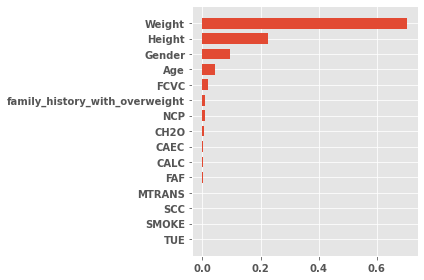

In [82]:
#Implementation modified from https://github.com/parrt/random-forest-importances/blob/master/src/rfpimp.py#L284
def custom_permutation_importance(random_forest, x, y):
    baseline =  f1_score(y, random_forest.predict(x), average='macro')
    x_copy = x.copy()
    importances = []
    for col in x_copy.columns:
        save = x_copy[col].copy()
        x_copy[col] = np.random.permutation(x_copy[col])
        m = f1_score(y, random_forest.predict(x_copy), average='macro')
        x_copy[col] = save
        importances.append(baseline - m)
    importances = np.array(importances)

    I = pd.DataFrame(data={"names": x.columns, "importances": importances})
    I = I.sort_values("importances", ascending=True)

    return I

importances = custom_permutation_importance(rf_model, X_test, y_test)
fig = plt.figure(figsize=(6, 4))
plt.barh(importances.names,
        importances.importances.values,
        height=0.7)
fig = fig.tight_layout()
plt.show()

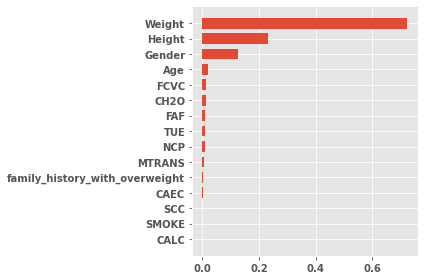

In [83]:
importances = custom_permutation_importance(xgb_model, X_test, y_test)
fig = plt.figure(figsize=(6, 4))
plt.barh(importances.names,
        importances.importances.values,
        height=0.7)
fig = fig.tight_layout()
plt.show()

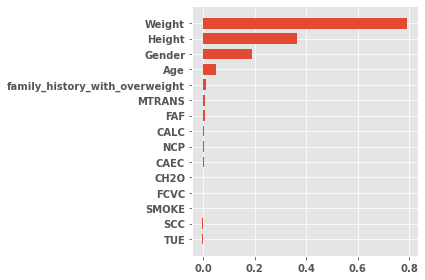

In [84]:
importances = custom_permutation_importance(svm_model, X_test, y_test)
fig = plt.figure(figsize=(6, 4))
plt.barh(importances.names,
        importances.importances.values,
        height=0.7)
fig = fig.tight_layout()
plt.show()

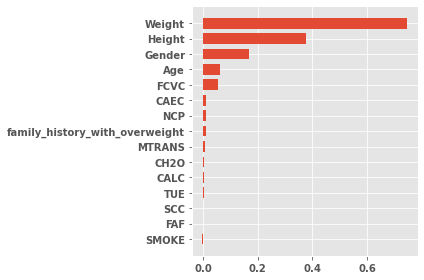

In [85]:
importances = custom_permutation_importance(lgr_model, X_test, y_test)
fig = plt.figure(figsize=(6, 4))
plt.barh(importances.names,
        importances.importances.values,
        height=0.7)
fig = fig.tight_layout()
plt.show()

## Drop column

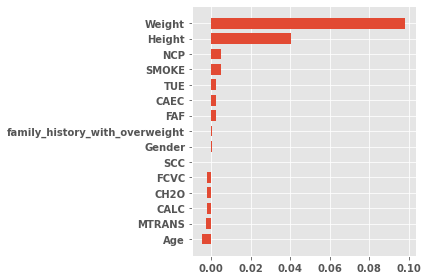

In [86]:
#Implementation modified from https://github.com/parrt/random-forest-importances/blob/master/src/rfpimp.py#L292
from sklearn.base import clone
def custom_dropcol_importance(random_forest, x_train, y_train,x_test,y_test):
    random_forest_ = clone(random_forest)
    random_forest_.random_state = 999
    random_forest_.fit(x_train, y_train)
    baseline = f1_score(y_test, random_forest_.predict(x_test), average='macro')
    importances = []
    for col in x_train.columns:
        x_train_without_column = x_train.drop(col, axis=1)
        x_test_without_column = x_test.drop(col, axis=1)
        random_forest_ = clone(random_forest)
        random_forest_.random_state = 999
        random_forest_.fit(x_train_without_column, y_train)
        o = f1_score(y_test, 
                     random_forest_.predict(x_test_without_column), 
                     average='macro')
        importances.append(baseline - o)
    importances = np.array(importances)
  
    I = pd.DataFrame(data={"names": x_train.columns, "importances": importances})
    I = I.sort_values("importances", ascending=True)

    return I

importances = custom_dropcol_importance(rf_model,
                                        X_train, y_train, 
                                        X_test, y_test)
fig = plt.figure(figsize=(6, 4))
plt.barh(importances.names,
        importances.importances.values,
        height=0.7)
fig = fig.tight_layout()
plt.show()

[02:44:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:44:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:44:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:44:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation

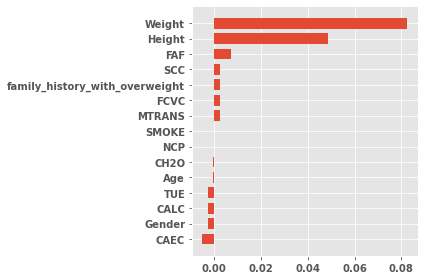

In [87]:
importances = custom_dropcol_importance(xgb_model,
                                        X_train, y_train, 
                                        X_test, y_test)
fig = plt.figure(figsize=(6, 4))
plt.barh(importances.names,
        importances.importances.values,
        height=0.7)
fig = fig.tight_layout()
plt.show()

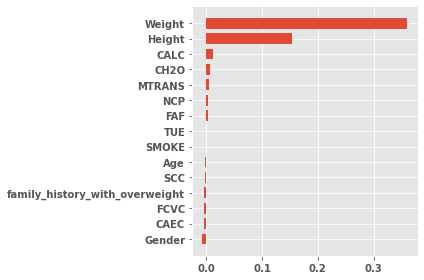

In [88]:
importances = custom_dropcol_importance(svm_model,
                                        X_train, y_train, 
                                        X_test, y_test)
fig = plt.figure(figsize=(6, 4))
plt.barh(importances.names,
        importances.importances.values,
        height=0.7)
fig = fig.tight_layout()
plt.show()

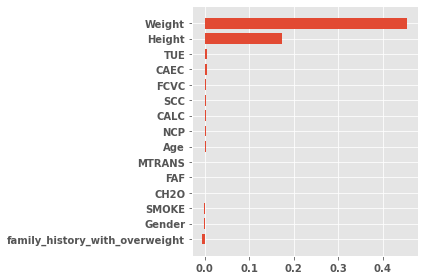

In [89]:
importances = custom_dropcol_importance(lgr_model,
                                        X_train, y_train, 
                                        X_test, y_test)
fig = plt.figure(figsize=(6, 4))
plt.barh(importances.names,
        importances.importances.values,
        height=0.7)
fig = fig.tight_layout()
plt.show()

## Iteration Feature selection

In [89]:
#XGBoost:
from copy import copy

X_no_FAVC = X_train.drop(['CAEC'], axis=1).copy()
xgb_model_copy =  copy(xgb_model)
xgb_model_copy.fit(X_no_FAVC, y_train)

y_hat_xgb = xgb_model_copy.predict(X_test.drop(['CAEC'], axis=1).copy())
f1_xgb = f1_score(y_test, y_hat_xgb, average='macro')
f1_xgb

[02:23:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9630849916866958

In [124]:
#XGBoost:
from copy import copy

X_no_FAVC = X_train.drop(['FAVC', 'TUE'], axis=1).copy()
svm_model_copy =  copy(svm_model)
svm_model_copy.fit(X_no_FAVC, y_train)

y_hat_svm= svm_model_copy.predict(X_test.drop(['FAVC', 'TUE'], axis=1).copy())
f1_svm = f1_score(y_test, y_hat_svm, average='macro')
f1_svm

0.9585518136189567